In [83]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pylab as pl
%matplotlib inline

In [47]:
# reading the Excel File into a pandas df 
df = pd.read_excel('Garmin Fully Combined Table.xlsx')

In [48]:
df = pd.DataFrame(df)

In [49]:
# checking for null values 
df.isnull()

,Date,Sleep Duration,Resting Heart Rate,Stress,Body Battery
0,False,True,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
57,False,False,False,False,False
58,False,False,False,False,False
59,False,False,False,False,False
60,False,False,False,False,False


In [50]:
# checking the number of null values 
df.isnull().sum()

Date                   0
Sleep Duration         4
Resting Heart Rate     2
Stress                 0
Body Battery           0
dtype: int64

In [51]:
# Checking the df types 
df.dtypes


Date                   datetime64[ns]
Sleep Duration                 object
Resting Heart Rate            float64
Stress                          int64
Body Battery                    int64
dtype: object

In [97]:
# chaning the resting heart rate column into an integer data type
df['Resting_HR'] = df['Resting_HR'].astype(int)

In [98]:
# dropping null values 
df = df.dropna()

In [99]:
df = df.rename(columns={'Sleep Duration': 'Sleep_Duration', 'Resting Heart Rate': 'Resting_HR', 'Body Battery': 'Body_Battery'
                       , 'Date': 'My_Date'})




In [100]:
# deleting any trailing or leading white space in the labels 
df.columns = df.columns.str.strip()

In [137]:
# stripping the hrs out of the sleep duration data to convert it to an integer value
df['Sleep_Duration'] = df['Sleep_Duration'].str.replace(' hrs', '')

In [102]:
df.head()

,My_Date,Sleep_Duration,Resting_HR,Stress,Body_Battery
1,2022-12-01,8.32,54,26,57
2,2022-12-02,8.12,50,28,98
4,2022-12-04,7.02,56,44,23
5,2022-12-05,10.28,46,19,100
7,2022-12-07,9.30,46,24,100


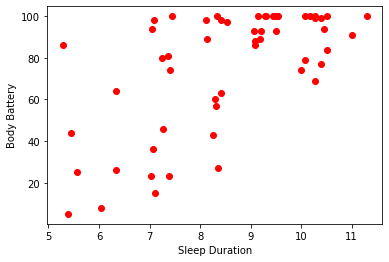

In [103]:
plt.scatter(df.Sleep_Duration, df.Body_Battery, color='red')
plt.xlabel('Sleep Duration')
plt.ylabel('Body Battery')
plt.show()

In [121]:
sleep_corr = df['Sleep_Duration'].corr(df['Body_Battery'])
print(sleep_corr)

0.6399815067118241


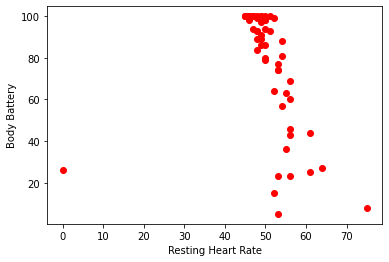

In [104]:
plt.scatter(df.Resting_HR, df.Body_Battery, color='red')
plt.xlabel('Resting Heart Rate')
plt.ylabel('Body Battery')
plt.show()

In [120]:
HR_corr = df['Resting_HR'].corr(df['Body_Battery'])
print(HR_corr)

-0.26754023954999073


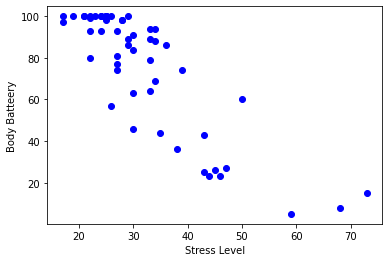

In [105]:
plt.scatter(df.Stress, df.Body_Battery, color='blue')
plt.xlabel('Stress Level')
plt.ylabel('Body Batteery')
plt.show()

In [118]:
stress_corr = df['Stress'].corr(df['Body_Battery'])
print(stress_corr)

-0.8498917858592171


In [112]:
# creating testing and training split 

msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

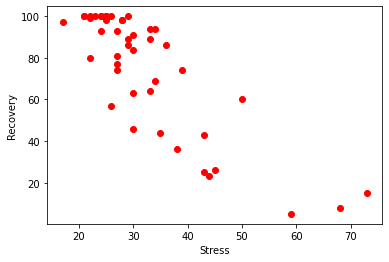

In [113]:
# plotting the training data 

plt.scatter(train.Stress, train.Body_Battery, color='red')
plt.xlabel('Stress')
plt.ylabel('Recovery')
plt.show()

# Multiple Linear Regression Model

A multiple linear regression model can be used to try and predict the relationship between multiple independent variable and a dependent variable. The problem with using the model in this scenario is that it assumes each independent variable has a linear relationship with the dependent variable, which in this case it not true. 

In [114]:
# Creating a Linear Regression Model 
from sklearn import linear_model
import numpy as np
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Stress', 'Resting_HR', 'Sleep_Duration']])
y = np.asanyarray(train[['Body_Battery']])
regr.fit(x,y)
print('Coefficients', regr.coef_)

Coefficients [[-1.68172225 -0.12182322  4.68436678]]


In [115]:
# predictions 
y_hat = regr.predict(test[['Stress', 'Resting_HR', 'Sleep_Duration']])
x = np.asanyarray(test[['Stress', 'Resting_HR', 'Sleep_Duration']])
y = np.asanyarray(test[['Body_Battery']])
print('Residual sun of squares %.2f'%np.mean((y_hat - y)**2))
print('Variance score:' , regr.score(x,y))

Residual sun of squares 179.64
Variance score: 0.8052538288156399


/Users/colbykeefe/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Findings

The Coeffiecients show that Sleep duration has the highest impact on recovery. However, it should be noted sleep duration also a relatively low correlation level. Stress has a strong negative impact, so when stress goes up by one unit, recovery goes down by 1.68 units. The residual sum of squares is a measure that shows how well the model fits the data, the score of 179 is rather high and shows that it is not a great fit for the data. A variance of 0.805 shows that the data points are not extremely spread from the mean. 


# Feature Importance Model

A feature importance model is a Machine Learning algorithm that calculatest the level of importance each independent variable has on the dependent varaible. In this case, it will determine which variable has the highest impact on recovery between stress, sleep duration, and resting heart rate. 

In [123]:
# checking the data types of each column
df.dtypes

My_Date           datetime64[ns]
Sleep_Duration           float64
Resting_HR                 int64
Stress                     int64
Body_Battery               int64
dtype: object

In [133]:
# changing the sleep duration column from a float to an integer as the model requries integer values 
df['Sleep_Duration'] = df['Sleep_Duration'].astype(int)

In [126]:
# checking to see that it worked 
df.dtypes

My_Date           datetime64[ns]
Sleep_Duration             int64
Resting_HR                 int64
Stress                     int64
Body_Battery               int64
dtype: object

In [128]:
#drop the date from the table
df_nd = df.drop('My_Date', axis=1)

In [129]:
# Splitting the data into X and Y. X data = the variables, Y data = Body_Battery
X = df_nd.drop('Body_Battery', axis=1)
Y = df_nd['Body_Battery']

In [130]:
# creating the model and fitting the X and Y data into it 
model = RandomForestRegressor()
model.fit(X,Y)

RandomForestRegressor()

In [134]:
# getting the importance values 
importances = model.feature_importances_
print(importances)

[0.0406789  0.23356661 0.72575449]


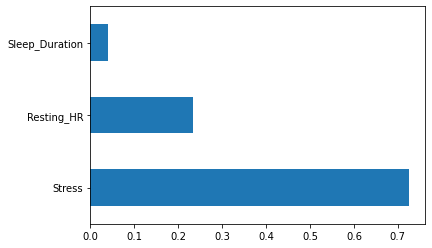

In [136]:
# plotting the importance scores onto a horizontal bar plot 
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

## Findings 

The graph above shows that stress is the highest impact independent variable on recovery. It accounts for over 70% of recovery. While resting heart rate accounts for 25% and sleep duration accounts for the remaining 5% of recovery. 